### Ejemplo de datos para gráfica de línea

In [1]:
import pandas as pd
import numpy as np

# Generar datos
fechas = pd.date_range(start="2000-01-01", end="2025-12-31", freq="YE")
n = len(fechas)

# Generar valores aleatorios que suben con el tiempo y caen bruscamente al final
valores = {
    "Fecha": fechas,
    "Columna1": np.concatenate([
        np.sort(np.random.uniform(100, 4000, n - 5)),  # Valores ascendentes aleatorios
        np.random.uniform(500, 1000, 5)  # Caída brusca al final
    ]),
    "Columna2": np.concatenate([
        np.sort(np.random.uniform(3000, 3100, n - 5)),
        np.random.uniform(3000, 3100, 5)
    ]),
    "Columna3": np.concatenate([
        np.sort(np.random.uniform(2000, 2100, n - 5)),
        np.random.uniform(2000, 2100, 5)
    ]),
    "Columna4": np.concatenate([
        np.sort(np.random.uniform(400, 2500, n - 5)),
        np.random.uniform(50, 500, 5)
    ]),
}

# Crear DataFrame
df = pd.DataFrame(valores)
df

,Fecha,Columna1,Columna2,Columna3,Columna4
0,2000-12-31,147.468217,3007.202199,2007.471090,402.345429
1,2001-12-31,327.865081,3016.998886,2010.365410,420.315048
2,2002-12-31,601.547367,3017.293265,2011.906716,491.522362
3,2003-12-31,686.760424,3023.548239,2012.072148,495.685260
4,2004-12-31,687.036065,3026.090076,2015.646237,539.880358
5,2005-12-31,981.553169,3029.800269,2017.130370,613.607126
6,2006-12-31,1086.186217,3034.493669,2021.806047,621.253743
7,2007-12-31,1144.462314,3042.478841,2023.534331,883.138828
8,2008-12-31,1333.738428,3044.808765,2031.406677,998.808134
9,2009-12-31,1525.195272,3047.213200,2036.541510,1206.953540


### **Código a copiar para la gráfica de línea:**

In [2]:
import subprocess

def limpiar_svg_con_scour(archivo_entrada, archivo_salida):
    subprocess.run([
        'scour', '-i', archivo_entrada, '-o', archivo_salida,
        '--enable-viewboxing', '--enable-id-stripping',
        '--shorten-ids', '--remove-descriptive-elements'
    ], check=True)

def limpiar_svg_con_svgo(archivo_entrada, archivo_salida):
    subprocess.run(['svgo', archivo_entrada, '-o', archivo_salida], check=True)

Scour processed file "linea.svg" in 16 ms: 8169/14481 bytes new/orig -> 56.4%

linea_scour.svg:
Done in 28 ms!
7.978 KiB - 14.5% = 6.82 KiB


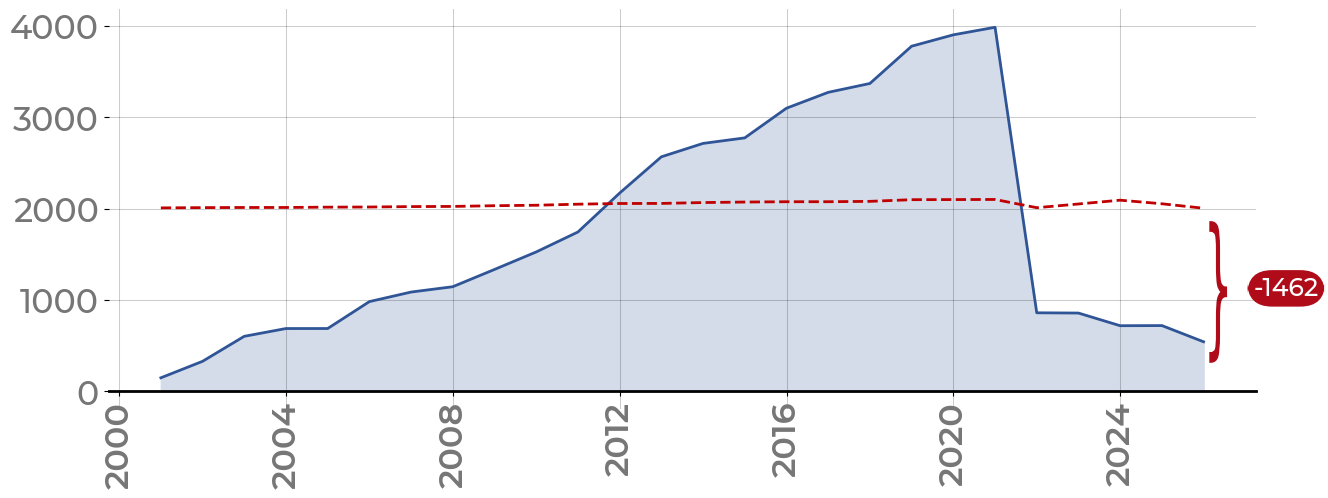

In [3]:
from pathlib import Path
import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.font_manager as font_manager


def curly_at_fechas(x, y, width, height, ax=None, color="k"):
    """
    Dibuja una llave '{' o '}' en cualquier lugar del gráfico.

    Parámetros:
    - x: Coordenada X (puede ser una fecha o un valor numérico).
    - y: Coordenada Y.
    - width: Ancho de la llave.
    - height: Altura de la llave.
    - ax: Eje de Matplotlib donde se dibujará la llave (opcional).
    - color: Color del símbolo de la llave (por defecto es negro).
    """
    if not ax:
        ax = plt.gca()
    
    # Si x es una fecha, convertirla a un valor numérico
    if isinstance(x, pd.Timestamp):
        x = date2num(x)
    
    # Crear el símbolo de la llave con una fuente explícita
    tp = TextPath((0, 0), "}", size=1, prop=dict(family="DejaVu Sans"))
    
    # Escalar y trasladar la llave
    trans = (
        mtrans.Affine2D().scale(width, height) +
        mtrans.Affine2D().translate(x, y) +
        ax.transData
    )
    
    # Crear y añadir el PathPatch al eje con el color especificado
    pp = PathPatch(tp, lw=0, fc=color, transform=trans)
    ax.add_artist(pp)



def lineal(df, 
           nombre, 
           columna_fecha, 
           columna_grafica, 
           columna_linea,
           font='Montserrat',
           ):
    """Genera una gráfica de área (area plot) para una columna específica de un DataFrame."""
    # Verificar que las columnas especificadas existan en el DataFrame
    if columna_fecha not in df.columns:
        raise ValueError(f"La columna '{columna_fecha}' no existe en el DataFrame.")
    if columna_grafica not in df.columns:
        raise ValueError(f"La columna '{columna_grafica}' no existe en el DataFrame.")
    if columna_linea not in df.columns:
        raise ValueError(f"La columna '{columna_linea}' no existe en el DataFrame.")
    
    font_config = {
        'family': font,  
        'variable_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'variable_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'capsula': {'size': 18, 'weight': 'medium', 'color': 'white'},
    }

    plt.rcParams['svg.fonttype'] = 'none'
    font_dirs = [Path("../0_fonts")]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    nombre_df = nombre or "linea"
    
    # Configurar el tamaño de la figura en píxeles
    ancho_px = 1480
    alto_px = 520
    dpi = 100  # Resolución en píxeles por pulgada
    ancho_in = ancho_px / dpi
    alto_in = alto_px / dpi
    
    # Crear la figura con el tamaño especificado
    fig, ax = plt.subplots(figsize=(ancho_in, alto_in), dpi=dpi)
    
    # Seleccionar colores específicos
    color_area = '#d4dce9'  # Primer color de la lista
    color_linea = '#2f5597'  # Segundo color de la lista
    color_linea_punteada = '#c00000'  # Color para la línea punteada
    
    # Graficar el área
    ax.fill_between(
        df[columna_fecha],
        df[columna_grafica],
        color=color_area,  # Color del área
        alpha=1.,
    )
    
    # Graficar la línea sobre el área
    ax.plot(
        df[columna_fecha],
        df[columna_grafica],
        color=color_linea,  # Color de la línea
        linewidth=2
    )
    
    # Graficar la línea punteada
    ax.plot(
        df[columna_fecha],
        df[columna_linea],
        color=color_linea_punteada,  # Color de la línea punteada
        linestyle='--',  # Estilo de línea punteada
        linewidth=2
    )

    # Configurar las etiquetas del eje X
    ax.tick_params(axis='x', labelsize=font_config['variable_x']['size'], labelcolor=font_config['variable_x']['color'])
    ax.tick_params(axis='y', labelsize=font_config['variable_y']['size'], labelcolor=font_config['variable_y']['color'])

    # Posicionar el eje X en y=0
    ax.spines['bottom'].set_position(('data', 0))

    # Rotar las etiquetas del eje X
    plt.xticks(rotation=90, fontname=font_config['family'], fontsize=font_config['variable_x']['size'], color=font_config['variable_x']['color'], weight=font_config['variable_x']['weight'])
    plt.yticks(fontname=font_config['family'], fontsize=font_config['variable_y']['size'], color=font_config['variable_y']['color'], weight=font_config['variable_y']['weight'])
    
    # Desactivar o activar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    
    # Asignar grosor a los ejes visibles
    ax.spines['bottom'].set_linewidth(2)  # Grosor del eje inferior
    
    # Mantener las líneas del grid
    ax.grid(axis='y', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)
    ax.grid(axis='x', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)
    
    # Convertir la fecha 2024 a un índice o posición en el eje X
    x_pos = df["Fecha"].iloc[-1]
    y_pos_gra = df[columna_grafica].iloc[-1]
    y_pos_lin = df[columna_linea].iloc[-1]
    if y_pos_gra > y_pos_lin:
        y_pos_min = y_pos_lin
        y_pos_max = y_pos_gra
    else:   
        y_pos_min = y_pos_gra
        y_pos_max = y_pos_lin
    altura = y_pos_max - y_pos_min

    # Calcular los factores proporcionales
    x_min, x_max = ax.get_xlim()  # Obtener los límites del eje X
    y_min, y_max = ax.get_ylim()  # Obtener los límites del eje Y

    factor_ancho = 0.04 * (x_max - x_min)  # Proporcional al rango del eje X
    factor_alto = 0.05 * (y_max - y_min)   # Proporcional al rango del eje Y

    # Añadir el símbolo de la llave
    curly_at_fechas(x_pos, y_pos_min+0.2*factor_alto, width=factor_ancho, height=altura+factor_alto, ax=ax, color="#af0b19")
    
    # Calcular la diferencia entre y_pos_gra y y_pos_lin
    diferencia = round(y_pos_gra - y_pos_lin)

    # Añadir una cápsula con la diferencia en la parte derecha de la gráfica
    color_capsula = "#af0b19"  # Color de la cápsula
    bbox_props = dict(boxstyle="round,pad=0.25,rounding_size=0.99", fc=color_capsula, ec="none", alpha=1.0)

    x_pos_numeric = date2num(x_pos)  # Convertir la fecha a un número

    # Posicionar la cápsula en la parte derecha de la gráfica
    ax.text(
        x_pos_numeric + 1.8 * factor_ancho,  # Usar el valor numérico de x_pos
        y_pos_min + altura / 2.5,  # Centrar verticalmente entre y_pos_gra y y_pos_lin
        diferencia,  # Texto de la cápsula
        color=font_config['capsula']['color'],
        fontsize=font_config['capsula']['size'],
        fontweight=font_config['capsula']['weight'],
        fontname=font_config['family'],
        bbox=bbox_props,
        ha="center",
        va="center"
    )

    # Ejemplo: agregar título usando font_config
    # ax.set_title("Título de la gráfica", fontsize=font_config['titulo']['size'], fontweight=font_config['titulo']['weight'], color=font_config['titulo']['color'], fontname=font_config['family'])

    plt.savefig(f"{nombre_df}.svg", format='svg', bbox_inches='tight', dpi=300)
    plt.savefig(f"{nombre_df}.png", format='png', bbox_inches='tight', dpi=300)
    nombre_svg = f"{nombre_df}.svg"
    nombre_svg_limpio = f"{nombre_df}_scour.svg"
    nombre_svg_svgo = f"{nombre_df}_svgo.svg"

    try:
        limpiar_svg_con_scour(nombre_svg, nombre_svg_limpio)
    except Exception as e:
        print("Error al limpiar con Scour:", e)

    try:
        limpiar_svg_con_svgo(nombre_svg_limpio, nombre_svg_svgo)
    except Exception as e:
        print("Error al limpiar con SVGO:", e)

    plt.show()

# Ejemplo de uso
lineal(df, nombre='linea',  columna_fecha="Fecha", columna_grafica="Columna1", columna_linea="Columna3")